In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
url ='https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Titanic/titanic_train.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], inplace = True, axis = 1)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [14]:
pd.get_dummies(df.Sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [17]:
new_df=pd.get_dummies(df)

In [18]:
new_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1
887,1,1,19.0,0,0,30.0000,1,0
888,0,3,NaN,1,2,23.4500,1,0
889,1,1,26.0,0,0,30.0000,0,1


<Axes: >

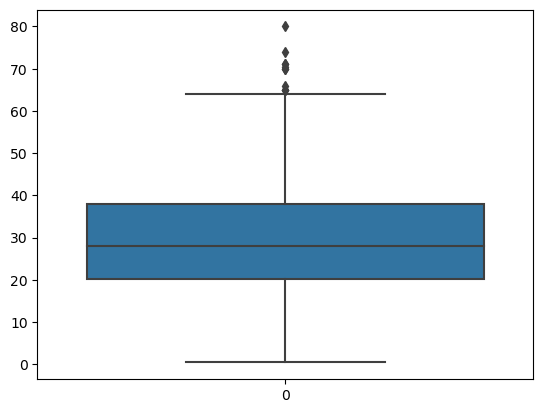

In [19]:
sns.boxplot(df['Age'])

<Axes: >

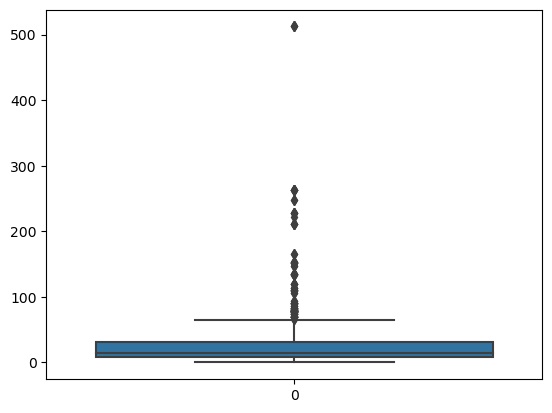

In [20]:
sns.boxplot(df['Fare'])

C:\Users\user\AppData\Local\Temp\ipykernel_5924\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

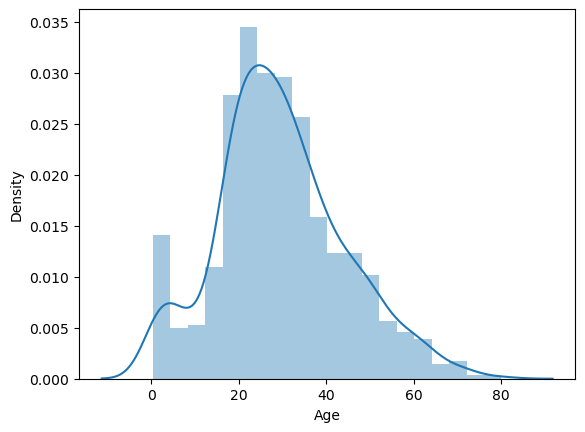

In [21]:
sns.distplot(df['Age'])

C:\Users\user\AppData\Local\Temp\ipykernel_5924\3425841524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

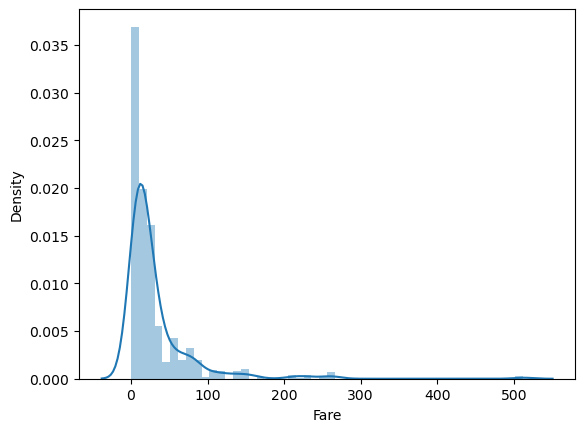

In [22]:
sns.distplot(df['Fare'])

In [23]:
df.skew()

C:\Users\user\AppData\Local\Temp\ipykernel_5924\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [24]:
new_df.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
dtype: int64

In [25]:
new_df['Age']=new_df['Age'].fillna(new_df.Age.mean())

In [27]:
new_df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
dtype: int64

In [33]:
out = ['Age', 'Fare']
for i in out:
    q25, q75 = new_df[i].quantile([.25,.75])
    iqr = q75-q25
    min = q25-(1.5*iqr)
    max = q75+(1.5*iqr)
    new_df[i].values[new_df[i]>max]=np.nan
    new_df[i].values[new_df[i]<min]=np.nan
    

In [34]:
new_df.isnull().sum()

Survived        0
Pclass          0
Age            66
SibSp           0
Parch           0
Fare          116
Sex_female      0
Sex_male        0
dtype: int64

In [35]:
new_df['Age']=new_df['Age'].fillna(new_df.Age.mean())
new_df['Fare']=new_df['Fare'].fillna(new_df.Fare.mean())

In [36]:
new_df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
dtype: int64

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [38]:
x=new_df.iloc[:,new_df.columns!='Survived']
y =new_df['Survived']

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [40]:
model_rf=RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
pred=model_rf.predict(x_test)
accuracy_score(y_test,pred)

0.8208955223880597